<a href="https://colab.research.google.com/github/srishtiagarwall/Breast-Cancer-Detection/blob/main/Breast_Cancer_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [2]:
# Loading the dataset from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# Loading the data to a data frame
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
# Print the first 5 rows of dataframe
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Adding the 'target' column to dataframe
df['label'] = breast_cancer_dataset.target

In [7]:
# Print the last 5 rows of dataframe
df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
# Number of rows and column in dataset
df.shape

(569, 31)

In [9]:
# Getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# Checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
# Statistical measures about the data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# Checking the distribution of target values
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

0 == **Malignant,**
1 == **Benign**

In [13]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


<Axes: xlabel='label', ylabel='count'>

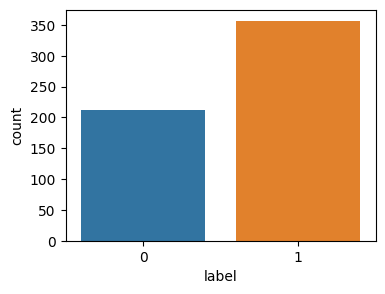

In [14]:
plt.figure(figsize=(4,3))
sns.countplot(data = df, x = 'label', label='count')

In [30]:
#Encode the categorical data value
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,30] = labelencoder_Y.fit_transform(df.iloc[:,30].values)

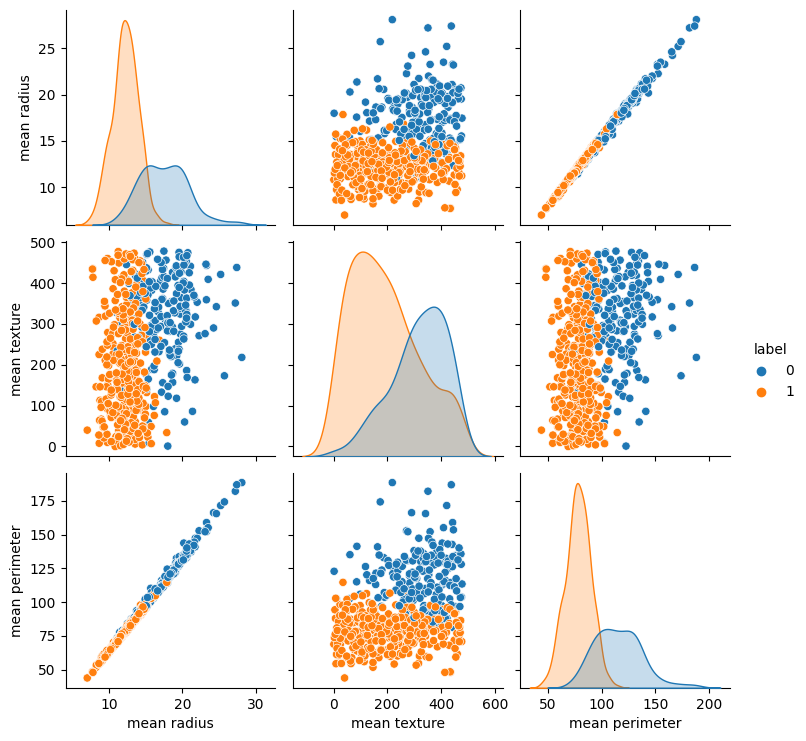

In [33]:
sns.pairplot(data=df.iloc[:,[0,1,2,30]], hue='label')

In [35]:
#Get the correlation of the column
df.iloc[:,:].corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.348567,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.348567,1.000000,0.355830,0.345076,0.002182,0.271252,0.336697,0.327032,0.098403,-0.062864,...,0.894202,0.382459,0.361780,0.101854,0.304066,0.333631,0.331709,0.135910,0.135395,-0.458623
mean perimeter,0.997855,0.355830,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.345076,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,0.002182,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.271252,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.336697,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.327032,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.098403,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.062864,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

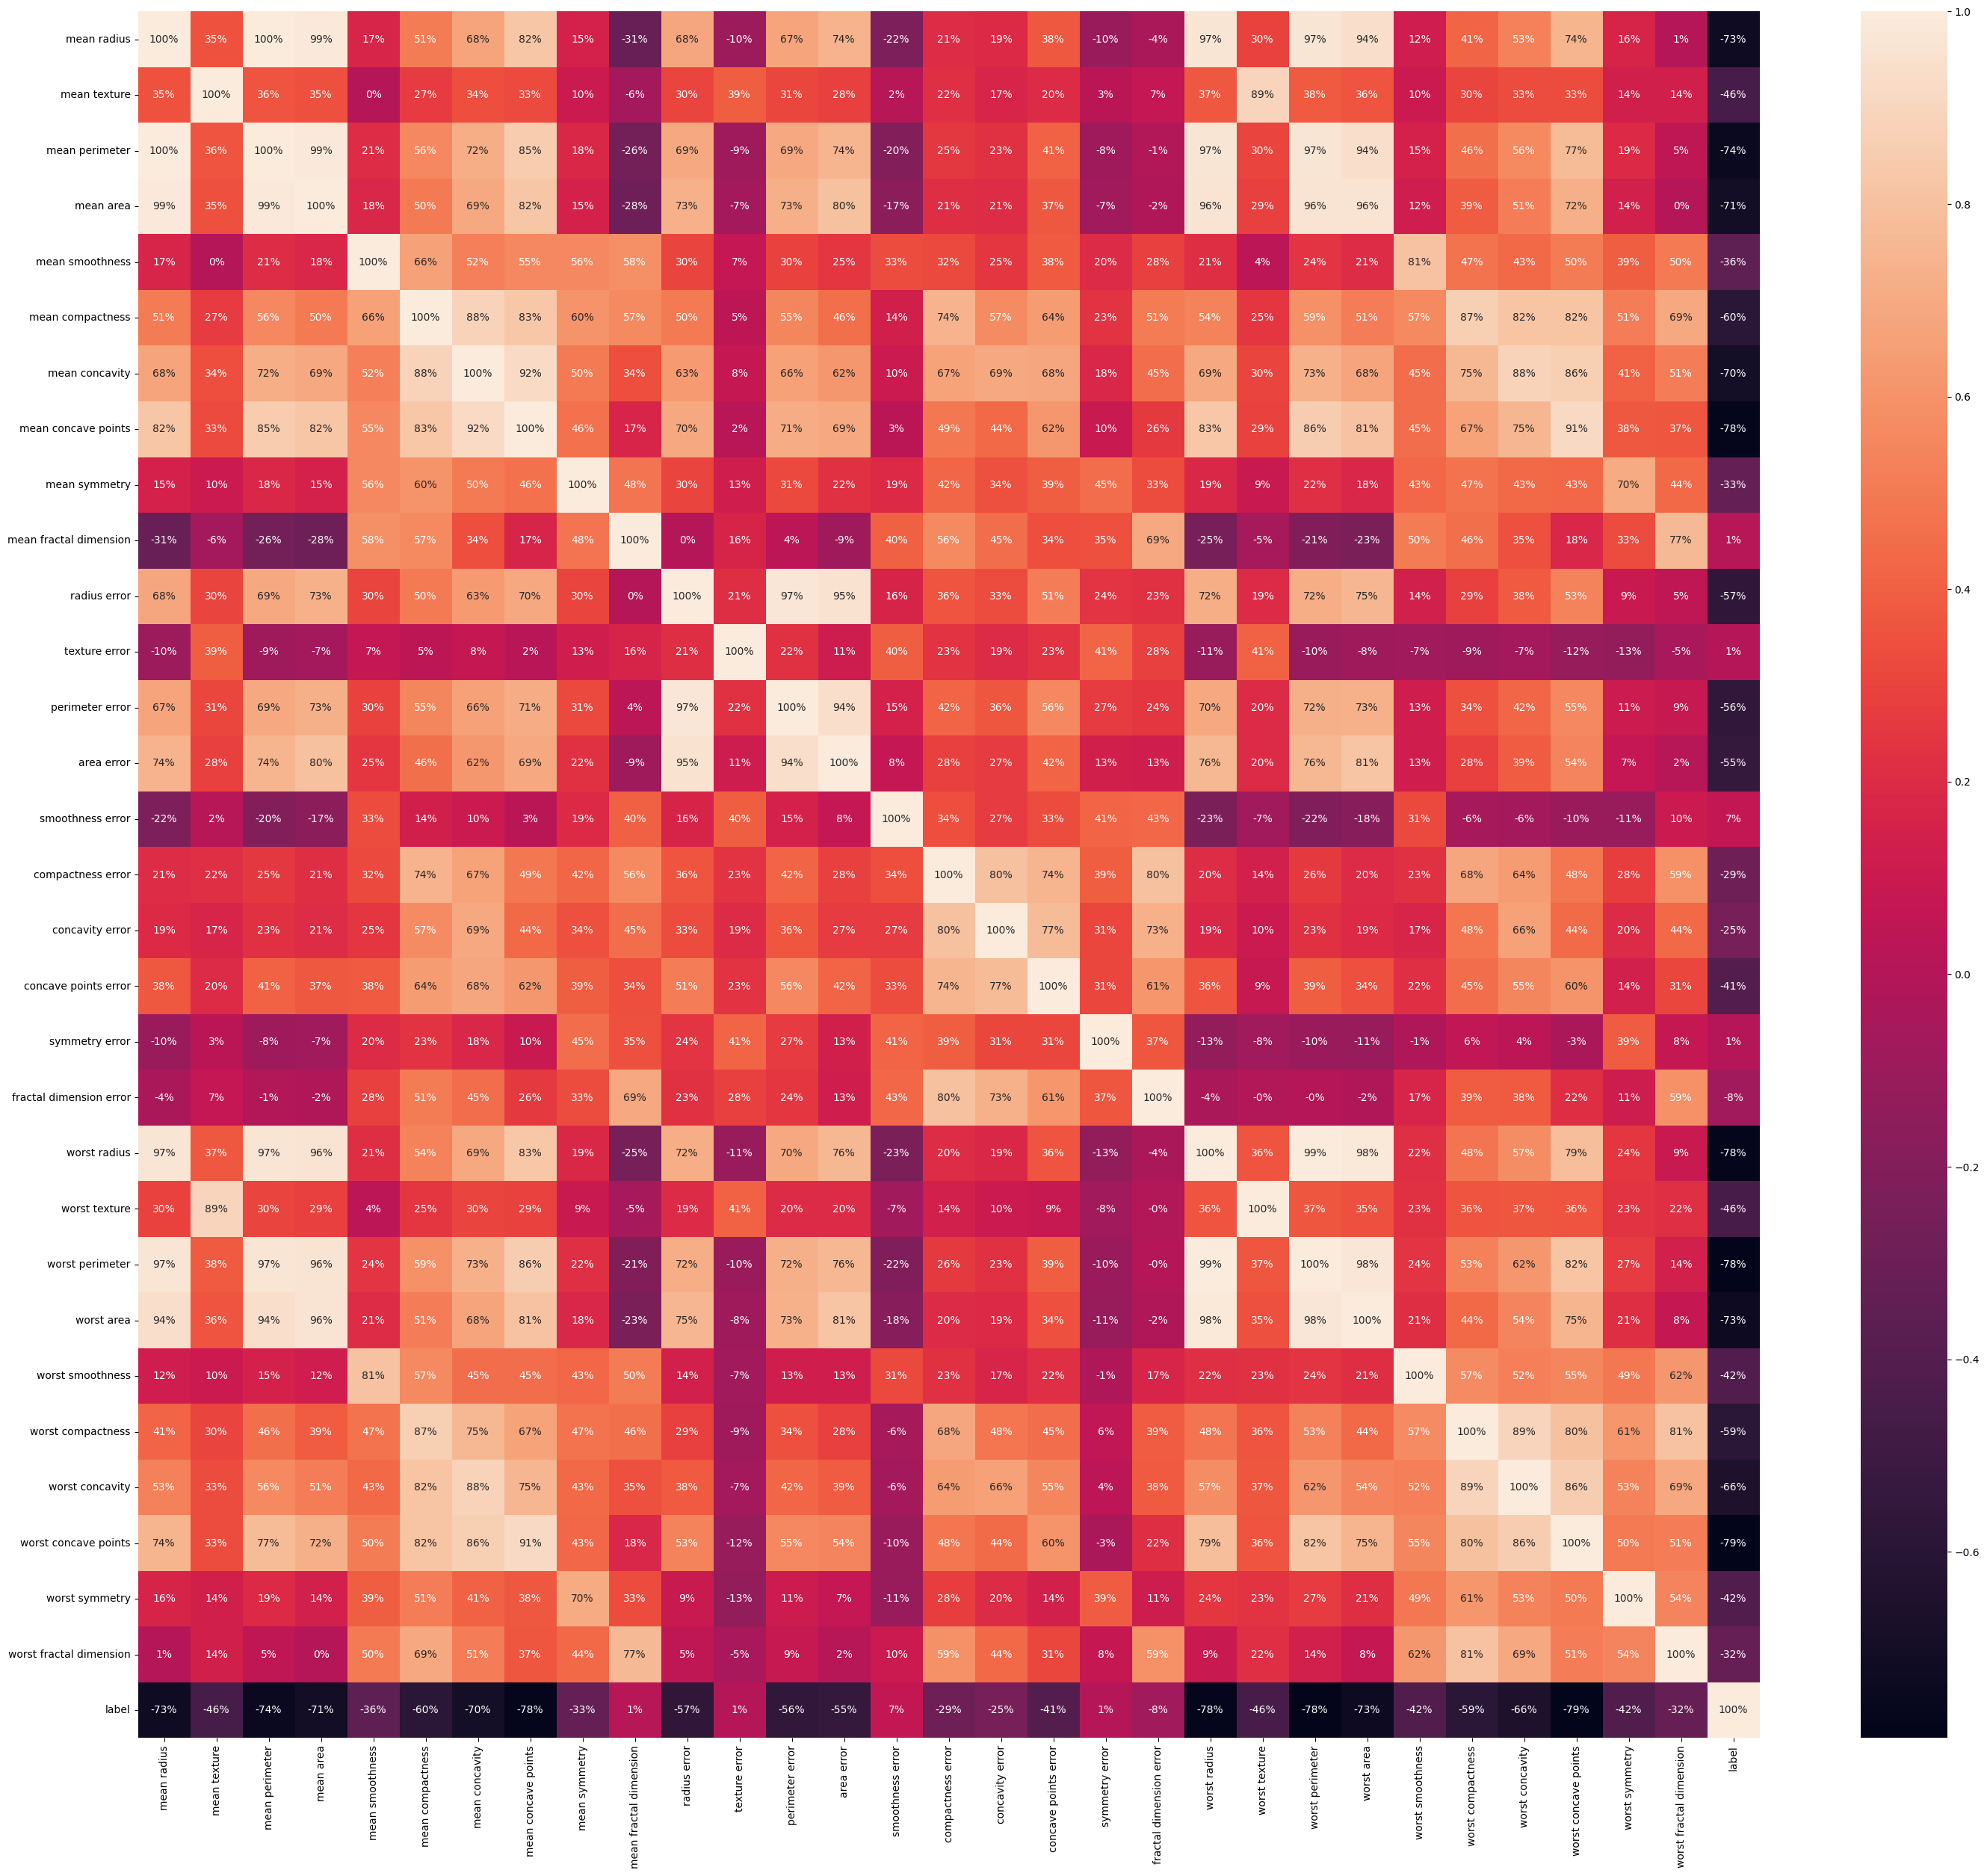

In [44]:
#visualize correlation
plt.figure(figsize=(35,30))
sns.heatmap(df.iloc[:,:].corr(), annot=True, fmt='.0%')

Separating the features and target

In [45]:
X = df.drop(columns = 'label', axis = 1)
Y = df['label']

In [46]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99             1          122.80     1001.0          0.11840   
1          20.57           186          132.90     1326.0          0.08474   
2          19.69           324          130.00     1203.0          0.10960   
3          11.42           297           77.58      386.1          0.14250   
4          20.29            60          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56           370          142.00     1479.0          0.11100   
565        20.13           463          131.20     1261.0          0.09780   
566        16.60           458          108.30      858.1          0.08455   
567        20.60           467          140.10     1265.0          0.11780   
568         7.76           414           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [47]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Splitting the data into training data and testing data

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


**Model Training**

In [50]:
# Create a function for the models
def models(X_train, Y_train):

  # Logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, Y_train)

  # Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train, Y_train)

  # Print the respective models accuracy on the training data
  print('(0) Logistic Regression - Training Accuracy:', log.score(X_train, Y_train) * 100)
  print('(1) Decision Tree - Training Accuracy:', tree.score(X_train, Y_train) * 100)
  print('(2) Random Forest - Classifier Training Accuracy:', forest.score(X_train, Y_train) * 100)

  return log, tree, forest

**Model Evaluation**

Training Data Accuracy

In [51]:
import warnings
from sklearn.exceptions import ConvergenceWarning # to remove warnings from next code's output
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [52]:
# Getting all the models
model = models(X_train, Y_train)

(0) Logistic Regression - Training Accuracy: 95.16483516483515
(1) Decision Tree - Training Accuracy: 100.0
(2) Random Forest - Classifier Training Accuracy: 100.0


Testing Data Accuracy

Model- 0


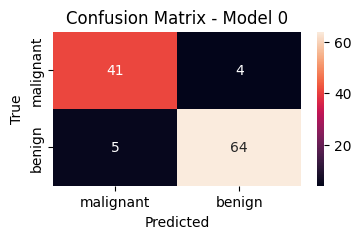



Testing Accuracy =  92.10526315789474


Model- 1


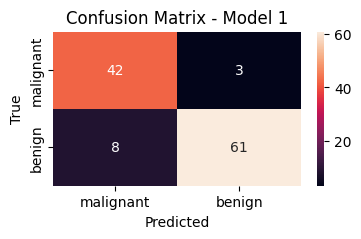



Testing Accuracy =  90.35087719298247


Model- 2


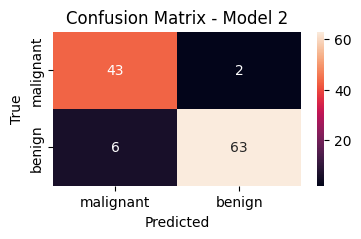



Testing Accuracy =  92.98245614035088




<Figure size 640x480 with 0 Axes>

In [55]:
# test model accuracy on test data o confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print('Model-', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  plt.figure(figsize=(4, 2))
  sns.heatmap(cm, annot=True, fmt='g', xticklabels=['malignant', 'benign'], yticklabels=['malignant', 'benign'])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f'Confusion Matrix - Model {i}')
  plt.show()

  TP = cm[0][0]
  TN = cm[1][1]
  FP = cm[0][1]
  FN = cm[1][0]

  print("\n")
  print('Testing Accuracy = ', (TP + TN) / (TP + TN + FN + FP) * 100)
  print("\n")

plt.tight_layout()
plt.show()

**Building a Predictive System**

In [61]:
import warnings
from sklearn.exceptions import ConvergenceWarning # to remove warnings from next code's output
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [66]:
# Input data
input_data = (18.25, 19.98, 119.6, 1040, 0.09463, 0.109, 0.1127, 0.074, 0.1794, 0.05742, 0.4467, 0.7732, 3.18, 53.91, 0.004314, 0.01382, 0.02254, 0.01039, 0.01369, 0.002179, 22.88, 27.66, 153.2, 1606, 0.1442, 0.2576, 0.3784, 0.1932, 0.3063, 0.08368)

# Feature names (column names) for the input data
feature_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
                 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error',
                 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error',
                 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error',
                 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
                 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

# Change the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are splitting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1) # one row with no specified columns

# Create a DataFrame with the input data and feature names
input_df = pd.DataFrame(data=input_data_reshaped, columns=feature_names)

for i in range(len(model)):
    prediction = model[i].predict(input_df)
    print(prediction)

    if prediction[0] == 0:
        print('The Breast Cancer is Malignant')
    else:
        print('The Breast Cancer is Benign')

[0]
The Breast Cancer is Malignant
[0]
The Breast Cancer is Malignant
[0]
The Breast Cancer is Malignant
